# Week 3 HW: Group Assignment 2: Census Data Exploration 
## Los Angeles County Population 

Hello, this is Audrey. Shinah and I are comparing the transit infrastructure of LA and Seoul; for this assignment, we will be focusing on Los Angeles. In this Jupyter notebook, I will be exploring population Census data for Los Angeles County. 

In [2]:
#Copied from the Lab:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

Defining variable for population by Census Tract in Los Angeles County. 

We used the 2019 American Community Survey Total Population Data (Table B01003):

In [3]:
LA_pop = gpd.read_file('AYJ-GroupData/acs2019_5yr_B01003_14000US06037534001.geojson')

How many Census tracts are there in LA County? 

In [4]:
LA_pop.shape

(2346, 5)

Hmm, there seems to be 1 less than Yoh's Lab python notebook. 

Checking if there's a County line in this dataset: 

In [5]:
LA_pop.head()

,geoid,name,B01003001,"B01003001, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,394.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Nope!

I want to rename the columns: 

In [6]:
LA_pop.columns = ['GEOID', 'Census Tract Name', 'Population', 'Error', 'geometry']

Did it work?

In [7]:
list(LA_pop)

['GEOID', 'Census Tract Name', 'Population', 'Error', 'geometry']

Yup!

Ok what does this dataset look like when mapped?

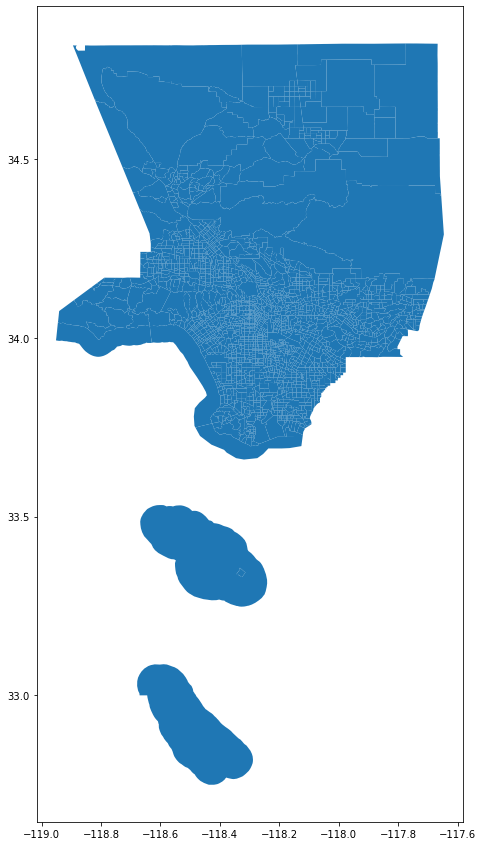

In [8]:
LA_pop.plot(figsize=(15,15))

Not very interesting. Let's see if we can find any patterns in the population data.

QUESTION: What Census tracts are those blobs? I want to drop the data... 

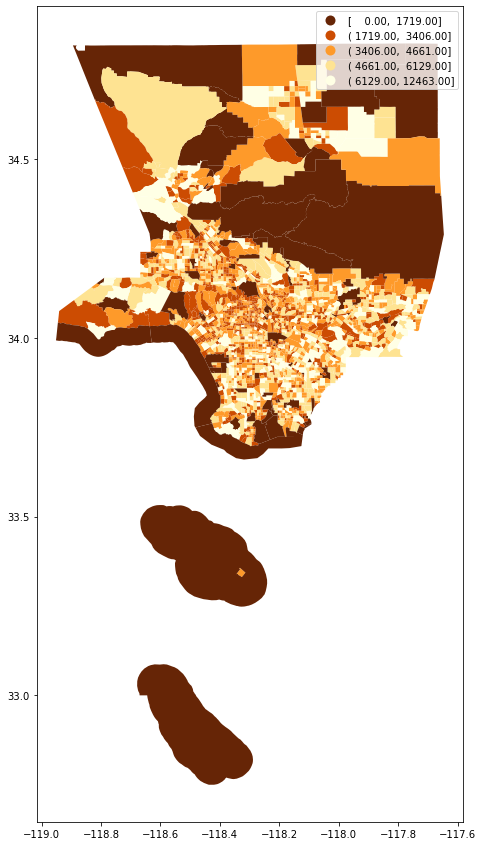

In [15]:
LA_pop.plot(figsize=(15,15),
                 cmap='YlOrBr_r',
                 column='Population',
                 legend=True, 
                 scheme='NaturalBreaks') #or 'quantiles'?

For map colors: supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

I want to see summary statistics of the population data in Los Angeles County Census Tracts.  

In [10]:
LA_pop['Population'].describe()

count     2346.000000
mean      4297.344416
std       1587.065962
min          0.000000
25%       3203.750000
50%       4211.500000
75%       5314.000000
max      12463.000000
Name: Population, dtype: float64

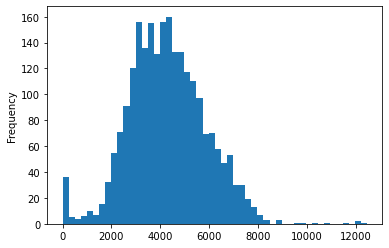

In [11]:
LA_pop['Population'].plot.hist(bins=50)

QUESTION: How do I change the labels for the legends/axes?

## Los Angeles County Job Density 

Now I will explore job density data from [OntheMap](https://onthemap.ces.census.gov/). Shinah will explore Means of Commute data in the other Jupyter notebook. 

In [22]:
LA_jobs = gpd.read_file('AYJ-GroupData/points_2018.shp')

In [23]:
LA_jobs

,id,c000,ca01,ca02,ca03,ce01,ce02,ce03,cns01,cns02,...,cr07,ct01,ct02,cd01,cd02,cd03,cd04,cg01,cg02,geometry
0,060374600003006,12.0,3.0,3.0,6.0,0.0,8.0,4.0,0.0,0.0,...,0.0,10.0,2.0,0.0,4.0,3.0,2.0,7.0,5.0,POINT (-2001134.000 -138945.141)
1,060374300025013,3.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,POINT (-1991025.125 -145032.016)
2,060374300025015,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,POINT (-1991167.125 -145140.297)
3,060374300025014,21.0,10.0,8.0,3.0,9.0,12.0,0.0,0.0,0.0,...,0.0,10.0,11.0,1.0,2.0,2.0,6.0,12.0,9.0,POINT (-1991184.625 -145096.594)
4,060374300025021,4.0,0.0,3.0,1.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1.0,0.0,2.0,2.0,0.0,3.0,1.0,POINT (-1991041.750 -145197.812)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63563,060379800011009,421.0,107.0,215.0,99.0,53.0,284.0,84.0,0.0,0.0,...,8.0,182.0,239.0,108.0,79.0,77.0,50.0,230.0,191.0,POINT (-2025392.625 -130972.312)
63564,060379800011008,309.0,126.0,122.0,61.0,77.0,162.0,70.0,0.0,0.0,...,7.0,158.0,151.0,62.0,43.0,44.0,34.0,160.0,149.0,POINT (-2025559.250 -130799.461)
63565,060379800011007,121.0,44.0,46.0,31.0,50.0,29.0,42.0,0.0,0.0,...,4.0,59.0,62.0,15.0,21.0,29.0,12.0,110.0,11.0,POINT (-2025941.375 -130808.984)
63566,060379800011005,97.0,25.0,52.0,20.0,12.0,42.0,43.0,0.0,0.0,...,5.0,49.0,48.0,17.0,17.0,22.0,16.0,21.0,76.0,POINT (-2026240.875 -129322.859)


In [24]:
list(LA_jobs)

['id',
 'c000',
 'ca01',
 'ca02',
 'ca03',
 'ce01',
 'ce02',
 'ce03',
 'cns01',
 'cns02',
 'cns03',
 'cns04',
 'cns05',
 'cns06',
 'cns07',
 'cns08',
 'cns09',
 'cns10',
 'cns11',
 'cns12',
 'cns13',
 'cns14',
 'cns15',
 'cns16',
 'cns17',
 'cns18',
 'cns19',
 'cns20',
 'cr01',
 'cr02',
 'cr03',
 'cr04',
 'cr05',
 'cr07',
 'ct01',
 'ct02',
 'cd01',
 'cd02',
 'cd03',
 'cd04',
 'cg01',
 'cg02',
 'geometry']

In [25]:
keep_job_columns = ['id',
 'c000',
 'geometry']

In [26]:
LA_jobs = LA_jobs[keep_job_columns]

In [27]:
LA_jobs

,id,c000,geometry
0,060374600003006,12.0,POINT (-2001134.000 -138945.141)
1,060374300025013,3.0,POINT (-1991025.125 -145032.016)
2,060374300025015,1.0,POINT (-1991167.125 -145140.297)
3,060374300025014,21.0,POINT (-1991184.625 -145096.594)
4,060374300025021,4.0,POINT (-1991041.750 -145197.812)
...,...,...,...
63563,060379800011009,421.0,POINT (-2025392.625 -130972.312)
63564,060379800011008,309.0,POINT (-2025559.250 -130799.461)
63565,060379800011007,121.0,POINT (-2025941.375 -130808.984)
63566,060379800011005,97.0,POINT (-2026240.875 -129322.859)


In [28]:
list(LA_jobs)

['id', 'c000', 'geometry']

In [29]:
LA_jobs.columns = ['id', 'Total number of jobs', 'geometry']

In [30]:
list(LA_jobs)

['id', 'Total number of jobs', 'geometry']

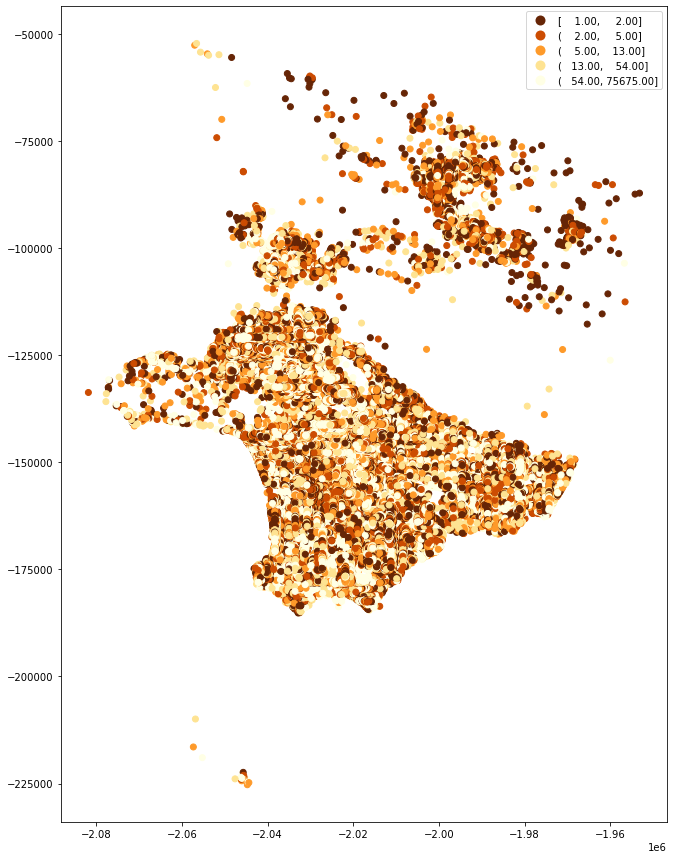

In [33]:
LA_jobs.plot(figsize=(15,15),
                 cmap='YlOrBr_r',
                 column='Total number of jobs',
                 legend=True, 
                 scheme='quantiles')

Need to add if statements